In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
X = iris.data[:, [2,3]]
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
class LogisticRegressionGD:
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses = []
        for _ in range(self.n_iter):
            output = self.activation(self.net_input(X))
            error = y - output
            self.w_ += self.eta * 2 * X.T.dot(error) / X.shape[0]
            self.b_ += self.eta * 2 * error.mean()
            loss = (-y.dot(np.log(output))-((1-y).dot(np.log(1-output)))/X.shape[0])
            self.losses.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return 1 / (1 + np.exp(-np.clip(X, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [10]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black'
                    )

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolors='black', alpha=1.0,
            linewidths=1, marker='o',
            s=100, label='Test set')

    

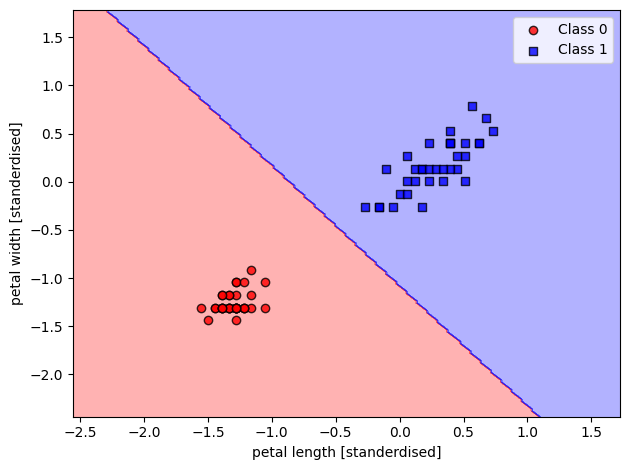

In [14]:
X_train_01_subset = X_train_std[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]
lrgd = LogisticRegressionGD(
    eta=0.3,
    n_iter=100,
    random_state=1
)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X_train_01_subset, y_train_01_subset, lrgd)
plt.xlabel('petal length [standerdised]')
plt.ylabel('petal width [standerdised]')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
X_combined_stack = np.vstack((X_train_std, X_test_std))
y_combined_stack = np.hstack((y_train, y_test))

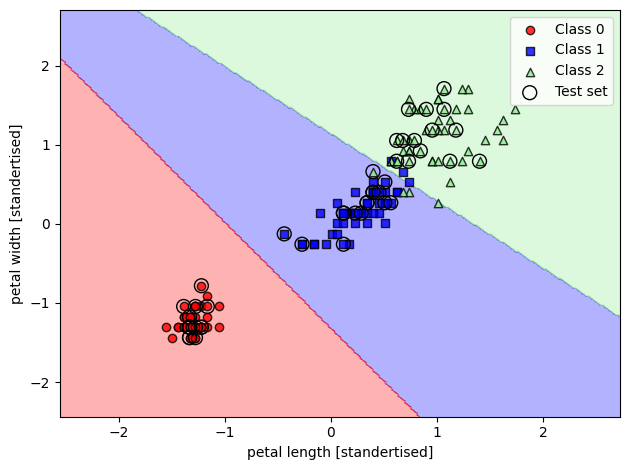

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_stack,
    y_combined_stack,
    lr,
    test_idx=range(105, 150)
)
plt.xlabel('petal length [standertised]')
plt.ylabel('petal width [standertised]')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
lr.predict_proba(X_test_std[:3, :])

array([[4.83995335e-05, 5.92935551e-02, 9.40658045e-01],
       [9.08928250e-01, 9.10476717e-02, 2.40784543e-05],
       [9.49639874e-01, 5.03535684e-02, 6.55750177e-06]])

In [22]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [23]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])